<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support Vector Machine Project-Breast Cancer

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates different classes in the input feature space. The "support vectors" are the data points closest to the decision boundary, and the goal of SVM is to maximize the margin between classes while minimizing classification errors. SVM can handle linear and non-linear relationships through the use of different kernel functions.

## Pros of Support Vector Machines (SVM):

1- Effective in High-Dimensional Spaces: SVMs work well in high-dimensional spaces, making them suitable for tasks with a large number of features.

2- Robust to Overfitting: SVMs are less prone to overfitting, especially in high-dimensional spaces, due to their focus on maximizing the margin.

3- Versatile Kernels: SVMs can use different kernel functions to handle non-linear relationships, allowing them to capture complex patterns in data.

----------------------------------------
1- Computational Intensity

2- Sensitivity to Noise

3- Difficulty in Parameter Tuning

----------------------------------------------------
###Support Vector Machines (SVM) use different kernel functions to transform input data into higher-dimensional spaces, allowing them to capture non-linear relationships. Here are some commonly used kernels in SVM:

*Linear Kernel
*Polynomial Kernel
*Radial Basis Function (RBF) or Gaussian Kernel
*Sigmoid Kernel
*Custom Kernels

Choosing the appropriate kernel depends on the characteristics of the data and the problem at hand. Experimentation and cross-validation are often used to determine the best kernel and associated parameters for a given task.


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get Dataset from SKLEARN

We'll use the built in breast cancer dataset from Scikit Learn. We can get with the load function:

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer=load_breast_cancer()

The dataset is presented in a dictionary form:

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


We can chech each elemnt of above list here:

In [8]:
print(cancer['data'][1])

[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]


In [9]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Create DataFrame

In [37]:
X = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [15]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## EDA

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
y

,Cancer
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
df=pd.concat([X,y], axis=1)

In [25]:
df.shape

(569, 31)

## Visualization

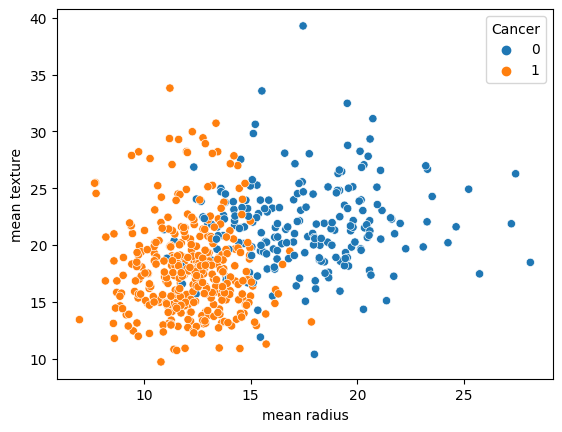

In [28]:
sns.scatterplot(data=df,x='mean radius',y='mean texture',hue='Cancer');

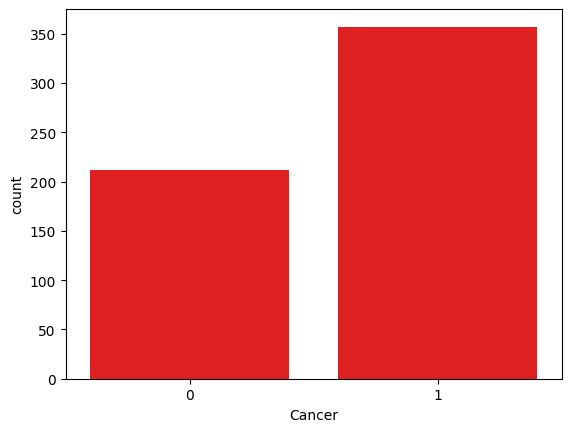

In [38]:
sns.countplot(data=df,x='Cancer',color='red');

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=.25,random_state=101)

## Train the Support Vector Classifier

In [41]:
from sklearn.svm import SVC

In [42]:
model = SVC()

In [43]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [44]:
y_pred=model.predict(X_test)

## Evaluation

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

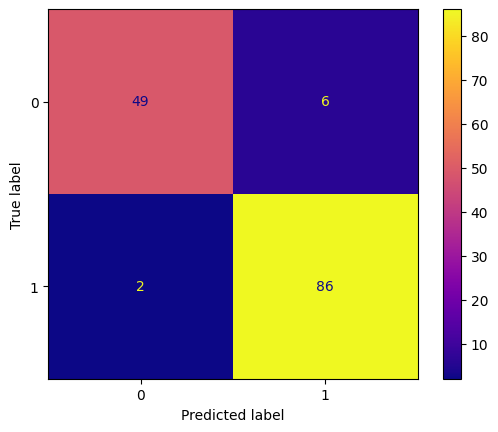

In [64]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
dis=ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot(cmap='plasma')

In [47]:
print(cm)
print(cr)

[[49  6]
 [ 2 86]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        55
           1       0.93      0.98      0.96        88

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



## Gridsearch

GridSearch, short for Grid Search Cross-Validation, is a technique used for hyperparameter tuning in machine learning. Hyperparameters are the configuration settings for a model that are not learned from the data but must be set prior to training. GridSearch involves systematically searching a predefined set of hyperparameter values to find the best combination that results in the optimal model performance.

In [49]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {'C': [0.1,1, 10, 100, 1000],  'gamma': [1,0.1,0.01,0.001,0.0001],'kernel': ['rbf']}

In [62]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=0)

In [63]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [55]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

## Evaluation Gridsearch

In [57]:
pred = grid.predict(X_test)

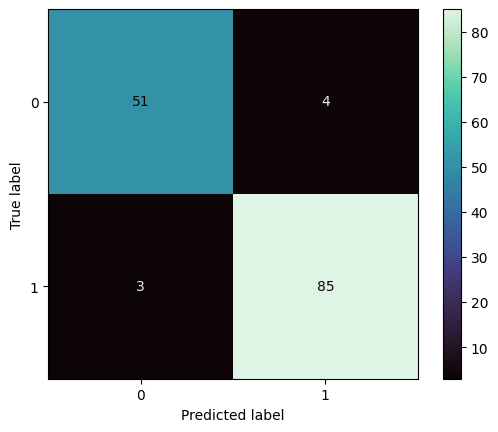

In [60]:
cm = confusion_matrix(y_test,pred)
cr = classification_report(y_test,pred)
dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot(cmap='mako');

In [61]:
print(cm)
print(cr)

[[51  4]
 [ 3 85]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.96      0.97      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



## Conclusion:

Accuracy Improvement:

The accuracy increased from 0.94 to 0.95 after the GridSearch, suggesting that the optimized hyperparameters improved the overall performance.

Precision, Recall, F1-Score Improvements:

Precision, recall, and F1-scores for both classes also show improvements, indicating better classification performance for both positive and negative classes.

These results suggest that the hyperparameter tuning through GridSearch contributed positively to the model's ability to generalize and perform well on unseen data. Keep in mind that while GridSearch helps in finding better hyperparameters, the improvement may not always be substantial, and careful consideration should be given to the specific context and requirements of the application.